In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

S_0 is the current stock price

K is the strike price

T is the expiration time

Vol is the volatality in the stock price

r is the rate of return

n is the number of discrete times when option can be executed

As $n\to\infty$, the price converges to that of a true american put option.

In [23]:
def AmericanPutOptionPrice(S_0, K, T, Vol, r, n):
    
    u = np.exp(Vol*np.sqrt(T/n))
    d = np.exp(-Vol*np.sqrt(T/n))
    beta = np.exp(-r*T/n)
    p = (1/beta - d)/(u - d)

    V = np.zeros([n+1,n+1])
    
    for i in range(n+1):
        V[n,i] = max(K - u**i * d**(n-i) * S_0, 0)
    
    for k in np.arange(n-1, -1, -1):
        for i in range(k+1):
            V[k,i] = max(K - u**i * d**(k-i) * S_0, beta*(p*V[k+1,i+1]+(1-p)*V[k+1,i]))
            
    return V[0,0]

In [40]:
S_0 = 10.0
K = 15.0
T = 1.0
Vol = 1.0
r = 0.09
n = 100

AmericanPutOptionPrice(S_0, K, T, Vol, r, n)

6.927852307816726

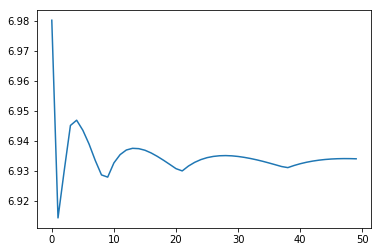

In [42]:
N = 50
price = np.zeros(N)
for i in range(N):
    price[i] = AmericanPutOptionPrice(S_0, K, T, Vol, r, (i+1)*10)
plt.plot(price)
plt.show()